# Welcome to the first guided LHCb Open Data Portal project! 

<div align="justify">Here you will be able to analyse data taken by the LHC. The aim of this study is for you to be able to search for differences in the behaviour of matter and [antimatter](https://en.wikipedia.org/wiki/Antimatter). This project will enable you to carry out your own data analysis on a similar level to CERN research, with some additional pointers towards any theoretical information or programming knowledge you might need.</div>

<div align="justify">Before you start, you might find it helpful to find out more about the concept of CP violation, where matter antimatter asymmetries come from and how we can detect them with experiments such as the LHCb experiment at CERN.</div>

Why do we think there is Matter Antimatter Asymmetry in the Universe? 
Have a look at some [CERN information on Matter Antimatter Asymmetry](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry).

What is CP violation? 
You can find out more [here](http://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) or [here](LINK CP Violation Insert).

How can we measure CP violation and thus asymmetry?
[Here is a brief overview of the role of particle physics research within this fundamental question](LINK TO PP ARTICLE HERE) and 
here you find more information about how specifically the [LHCb Experiment conducts research to find the answer](http://lhcb-public.web.cern.ch/lhcb-public/en/Physics/Beauty-en.html).


<div align="justify">Just like researchers at CERN, you will be coding your own analysis. These will use the computer programming language Python. There is no prerequisite of any specific programming language for following this project. Within it, there will be hints available to you helping you along the way but if you are entirely new to programming, and you might find some of these tutorials and libraries helpful:</div>

[Python Tutorial](http://www.tutorialspoint.com/python/)

(INPUT GEORGE Libraries)
(INPUT GEORGE Example Functions - Arsenal Analysis)

(DECIDE WHETHER TO CUT THE ENTIRE IMPLEMENTATION STAGE FOR THE PUBLIC PAGES)
Here you can see that you have been given your first few lines of code. These import libraries and functions that you might like to use during your analysis.

In [ ]:
%pylab inline
import numpy
import pandas
import root_numpy

If you are curious what each of these imported elements entail, you can find more information on these official websites of [NumPy](http://www.numpy.org/), [pandas](http://pandas.pydata.org/) and [root_numpy](https://pypi.python.org/pypi/root_numpy).

In [2]:
folder = '/lhcb-data/'

## Reading simulation data


<div align="justify">In order to make sure our code works correctly, we can write a piece of code and test it by using it on a set of simulated data. This is beneficial since we have information about the simulation which is not available to us for real data. Information like this could, for example for the particle physics decay process, be the knowledge of which exact decay process took place and we can also ask our simulation for precise masses. With real data, we can only use the detection data to then conclude the above mentioned information.</div>

(So let us begin by importing the simulated data:)
(Should we decide to hide the import process, inform user here of the data name and significance:

The (SimDataName) contains data which has been created through a [Monte Carlo](http://cerncourier.com/cws/article/cern/27924) simulation. These simulations are based on the [Monte Carlo Method](https://en.wikipedia.org/wiki/Monte_Carlo_method).

The (magnet up/ magnet down data) contains data collected by the LHCb experiment. You will find our more about the exact data gathering process in section [realData].

In [3]:
def load_data(filenames, preselection=None):
    # not setting treename, it's detected automatically
    data = root_numpy.root2array(filenames, selection=preselection)
    return pandas.DataFrame(data)

In [4]:
sim_data = load_data(folder + 'PhaseSpaceSimulation.root', preselection=None) 

<div align="justify">Now that you can access the data, you can use a number of functions which can help you analyse it. You can find these functions in the libraries at the top of the page. Try to make a table of the information within your data file: (Range? basically plotting things that help you draw a histogram)</div>

The data you have includes the following information about a particle: <img src="http://i.imgur.com/vzo5cZt.png" width="700" />


In [5]:
sim_data.head()

,H1_PX,H1_PY,H1_PZ,H2_PX,H2_PY,H2_PZ,H3_PX,H3_PY,H3_PZ,H1_Charge,H2_Charge,H3_Charge
0,3551.84,1636.96,23904.14,41507.15,15980.59,331663.64,36100.40,16546.83,295600.61,-1,1,-1
1,-2525.98,-5284.05,35822.00,-43182.91,-96553.03,585289.31,-8648.32,-16617.56,98535.13,1,-1,-1
2,-700.67,1299.73,8127.76,-1411.99,3550.96,16120.27,-13483.34,10860.77,79787.59,-1,1,1
3,3364.63,1397.30,222815.29,2192.42,1369.87,161924.75,1925.16,-551.12,40420.96,1,-1,1
4,-581.66,-1305.24,22249.59,1153.05,-1998.17,66134.22,-2820.04,-8305.43,250130.00,-1,1,-1


### Plotting a feature:

You can also plot any features of the data in a histogram. Try making a histogram for the first hadron’s momentum x-component (H1_PX):

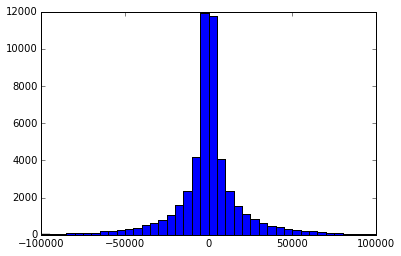

In [6]:
# hist data will contain all information from histogram
hist_data = hist(sim_data.H1_PX, bins=40, range=[-100000, 100000])

## Adding interesting features

Some variables that are especially interesting for particle physics analyses are the transverse momentum, Pt, the momentum in z-direction, Pz, and the energy of the particle, E. [Here](INSERT LINK TO INTERESTING VARIABLES) is a more detailed discussion of these variables.

When we consider the process of one heavy particle decaying to or splitting into multiple other particles, we need to keep conservation of energy in mind. This includes the momenta of the particles as well as their masses. Remember here, that one can see from the [Energy-momentum relation](https://en.wikipedia.org/wiki/Energy%E2%80%93momentum_relation) that momenta and mass need to be considered alongside each other to deliver enough information for us to be able to deduce the overall energy of the process.

With the help of these variables from the 'daughter' particles, we can identify the [Invariant Mass](https://en.wikipedia.org/wiki/Invariant_mass) of the decay. This then can help us to determine the origin or 'parent' of each particle by making use of [Relativistic Kinematics](http://www.phys.ufl.edu/~korytov/phz6355/note_A02_kinematics.pdf). 

Now, create variables for Pz, Pt and E:


In [7]:
def add_momenta_and_energy(dataframe, prefix, compute_energy=False):
    """Adding P, PT and У of particle with given prefix, say, 'H1_' """
    pt_squared = dataframe[prefix + 'PX'] ** 2. + dataframe[prefix + 'PY'] ** 2.
    dataframe[prefix + 'PT'] = numpy.sqrt(pt_squared)
    p_squared = pt_squared + dataframe[prefix + 'PZ'] ** 2.
    dataframe[prefix + 'P'] = numpy.sqrt(p_squared)
    if compute_energy:
        E_squared = p_squared + dataframe[prefix + 'M'] ** 2.
        dataframe[prefix + 'E'] = numpy.sqrt(E_squared)

Now add the masses of the hadrons of your choice. For this decay channel,
all 'daughter' particles are Kaons and you can find out the Kaon mass [here](http://pdg.lbl.gov/2014/reviews/rpp2014-rev-charged-kaon-mass.pdf).


In [8]:
for prefix in ['H1_', 'H2_', 'H3_']:
    # setting Kaon mass to each of particles:
    sim_data[prefix + 'M'] = 493
    add_momenta_and_energy(sim_data, prefix, compute_energy=True)

## Adding features of the $B$ meson

In order to make our particle table complete, you can ake use of what you have learnt about the Invariant Mass to determine the initial momenta of the [B meson](https://en.wikipedia.org/wiki/B_meson), as well as the mass of the B meson. After calculating these, add the values you have found to the data. (Add: B_PX, B_PY, B_PZ, B_P, B_PT, B_E and B_M)


In [9]:
def add_B_features(data):
    for axis in ['PX', 'PY', 'PZ', 'E']:
        data['B_' + axis] = data['H1_' + axis] + data['H2_' + axis] + data['H3_' + axis]
    add_momenta_and_energy(data, prefix='B_', compute_energy=False)
    data['B_M'] = data.eval('(B_E ** 2 - B_PX ** 2 - B_PY ** 2 - B_PZ ** 2) ** 0.5')

(Now add the features of the B meson to the features of the simulation data:)

In [10]:
add_B_features(sim_data)

Print out the table from step 3.) again to see the added features.

In [11]:
sim_data.head()

,H1_PX,H1_PY,H1_PZ,H2_PX,H2_PY,H2_PZ,H3_PX,H3_PY,H3_PZ,H1_Charge,...,H3_PT,H3_P,H3_E,B_PX,B_PY,B_PZ,B_E,B_PT,B_P,B_M
0,3551.84,1636.96,23904.14,41507.15,15980.59,331663.64,36100.40,16546.83,295600.61,-1,...,39711.918403,298256.193725,298256.601175,81159.39,34164.38,651168.39,657116.559870,88057.091969,657095.368711,5277.279087
1,-2525.98,-5284.05,35822.00,-43182.91,-96553.03,585289.31,-8648.32,-16617.56,98535.13,1,...,18733.305613,100300.092639,100301.304240,-54357.21,-118454.64,719646.44,731372.038019,130331.147530,731352.997274,5277.440126
2,-700.67,1299.73,8127.76,-1411.99,3550.96,16120.27,-13483.34,10860.77,79787.59,-1,...,17313.485569,81644.450519,81645.938965,-15596.00,15711.46,104035.62,106495.784261,22137.867814,106364.916303,5277.939480
3,3364.63,1397.30,222815.29,2192.42,1369.87,161924.75,1925.16,-551.12,40420.96,1,...,2002.492017,40470.532262,40473.534941,7482.21,2216.05,425161.00,425265.289437,7803.482818,425232.607246,5272.203976
4,-581.66,-1305.24,22249.59,1153.05,-1998.17,66134.22,-2820.04,-8305.43,250130.00,-1,...,8771.134082,250283.738371,250284.223918,-2248.65,-11608.84,338513.81,338761.386800,11824.618090,338720.269771,5277.881493


You can now plot the B meson mass in a histogram:

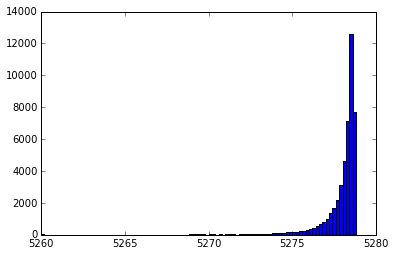

In [12]:
_ = hist(sim_data['B_M'], range=[5260, 5280], bins=100)

Describe what your histogram looks like. You will later produce the same histogram for real data instead of simulated data. What differences do you expect to observe when comparing those two histograms?

# Dalitz plot

The next step will include the production of Dalitz plots. We create these plots in order to analyse three body decays, since the kinematics of a three-body decay can be fully described using only two variables. In a traditional Dalitz plot, the axes of the plot are the squared invariant masses of two pairs of the decay products. Dalitz plots are used to identify potential resonances which are visible as bands on the Dalitz plot. More information about these plots and why these are used in particle physics research can be found here: 
	
[A Dalitz What Now?](http://www.quantumdiaries.org/2012/11/02/a-dalitz-what-now/)

[A Dalitz Introduction](http://www.fe.infn.it/cabeo_school/2012/pdf/pappagallo1.pdf)
	
In order to produce a Dalitz plot, think about the possible different pair combinations and use one of the libraries to draw them into the Dalitz plot. Also think about the labelling of axes and how you want to differentiate them:

In [13]:
def add_dalitz_variables(data):
    """function to add Dalitz variables, names of prudicts are H1, H2, H3"""
    for i, j in [(1, 2), (1, 3), (2, 3)]:
        momentum = pandas.DataFrame()
        for axis in ['E', 'PX', 'PY', 'PZ']:
            momentum[axis] = data['H{}_{}'.format(i, axis)] + data['H{}_{}'.format(j, axis)]
        
        data['M_{}{}'.format(i,j)] = momentum.eval('(E ** 2 - PX ** 2 - PY ** 2 - PZ ** 2) ** 0.5')

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


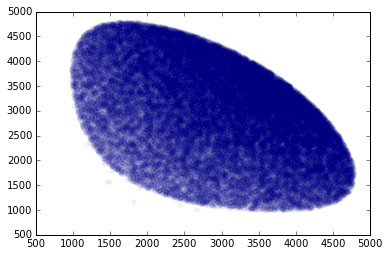

In [14]:
add_dalitz_variables(sim_data)
scatter(sim_data.M_12, sim_data.M_13, alpha=0.05)

# Working with real data

Now that you have analysed the simulation data towards some of its features, you can start applying the methods you have used to the real 2011 LHCb run 1 data. This data is collected by the LHCb detectors at CERN. To find out more about how the proton proton collision results in analysable data, look at: 
[The LHCb Detector](http://lhcb-public.web.cern.ch/lhcb-public/en/detector/Detector-en.html)

The data resulting from this process has at this point only been slightly filtered by trigger mechanisms of the detector. A trigger is an automated system within the detector that uses criteria based on interesting physics signatures to rapidly decide which events are worth keeping when only a small fraction of the total can be recorded. These are mostly needed due to limitations of the computing power of detectors. 

## Preselection
In order to now find the most suitable further selection cuts, make yourself familiar with how cuts can affect the significance of the final result. [Insert Chris' paper about ideal selction cuts here]. Also feel free to come back to this stage later and adjust your cuts to see the impact on your significance.

In [15]:
preselection = """
 H1_IPChi2 > 1 && H2_IPChi2 > 1 && H3_IPChi2 > 1
 && H1_IPChi2 + H2_IPChi2 + H3_IPChi2 > 500
 && B_VertexChi2 < 12
 && H1_ProbPi < 0.5 && H2_ProbPi < 0.5 && H3_ProbPi < 0.5
 && H1_ProbK  > 0.9 && H2_ProbK  > 0.9 && H3_ProbK  > 0.9
 && !H1_isMuon  
 && !H2_isMuon 
 && !H3_isMuon 
"""

preselection = preselection.replace('\n', '')

In [16]:
real_data = load_data([folder + 'B2HHH_MagnetDown.root', folder + 'B2HHH_MagnetUp.root'], preselection=preselection)

Add to the real data the masses of the hadrons for the decay channel you have chosen, just as you have before in step [6]:

In [17]:
for prefix in ['H1_', 'H2_', 'H3_']:
    # setting Kaon mass:
    real_data[prefix + 'M'] = 493
    add_momenta_and_energy(real_data, prefix, compute_energy=True)
    
add_B_features(real_data)

Now draw another histogram of the invariant mass of the B meson and compare it with the one you drew for the simulation data. Can you explain the differences you observe?

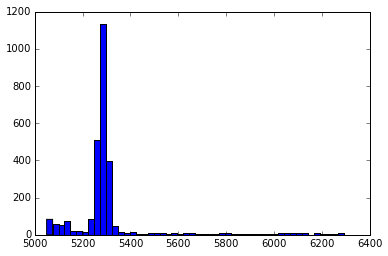

In [18]:
_ = hist(real_data.B_M, bins=50)

### Additional preselection
There are more cuts you can apply to make based on some physically significant decisions. 
Looking at the momentum distribution as well as the mass cuts, have a look at the cuts applied by scientists:

![](http://i.imgur.com/cp08Dhd.png)

In [19]:
momentum_preselection = """
 (H1_PT > 100) && (H2_PT > 100) && (H3_PT > 100)
 && (H1_PT + H2_PT + H3_PT > 4500)
 && H1_P > 1500 && H2_P > 1500 && H3_P > 1500
 && B_M > 5050 && B_M < 6300
"""

momentum_preselection = momentum_preselection.replace('\n', '').replace('&&', '&')

In [20]:
real_data = real_data.query(momentum_preselection)

Draw yet another invariant mass histogram and examine whether the cuts you have applied have changed the histogram. If you would like to, experiment with the cuts and see the impact of harsher or more lenient cuts:

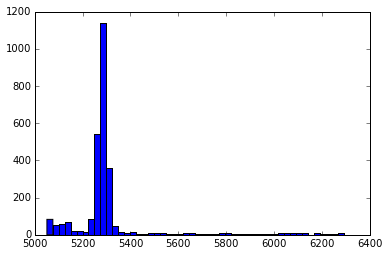

In [21]:
_ = hist(real_data.B_M, bins=50)

## Adding Dalitz plot for real data
Now draw a Dalitz plot for this real data. Think about checking that the signs of the charge of the hadrons are correct.

In [22]:
add_dalitz_variables(real_data)

Check that the 2nd and 3rd particle have the same sign:

In [23]:
numpy.mean(real_data.H2_Charge * real_data.H3_Charge)

1.0

<div align="justify">While drawing the Dalitz plot for the real data, label the axes accordingly. Compare the Dalitz Plots of the real data with the one for the simulation. 
What are the most striking differences? 
What have you read about resonances that can help you identify any interesting regions of this plot?</div>

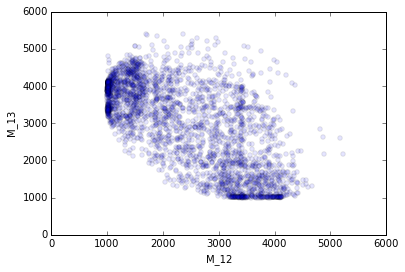

In [24]:
scatter(real_data['M_12'], real_data['M_13'], alpha=0.1)
xlabel('M_12'), ylabel('M_13')
show()

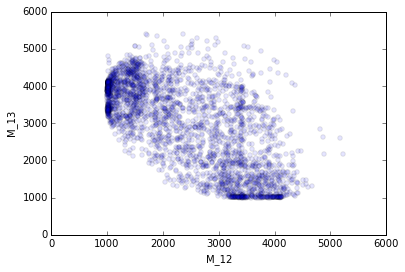

In [25]:
# lazy way for plots
real_data.plot('M_12', 'M_13', kind='scatter', alpha=0.1)

### Ordering dalitz variables
Now order the particle pairs by higher or lower mass pairs.

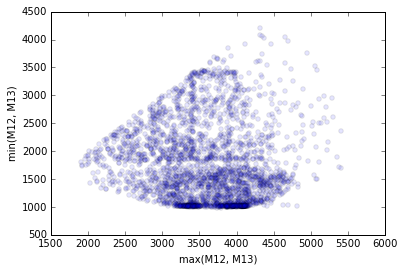

In [26]:
scatter(numpy.maximum(real_data['M_12'], real_data['M_13']),
        numpy.minimum(real_data['M_12'], real_data['M_13']),
        alpha=0.1)
xlabel('max(M12, M13)'), ylabel('min(M12, M13)')
show()

### Binned dalitz plot
The next step towards professional data analysis is the binning of the Dalitz plot. To find out why binning is often used in scientific analysis, have a look at some [information about binning](https://docs.tibco.com/pub/spotfire/6.0.0-november-2013/userguide-webhelp/bin/bin_what_is_binning.htm).

If you would like to customize your Dalitz plit, you can make sure of certain [colour libraries](https://github.com/BIDS/colormap/blob/master/colormaps.py).

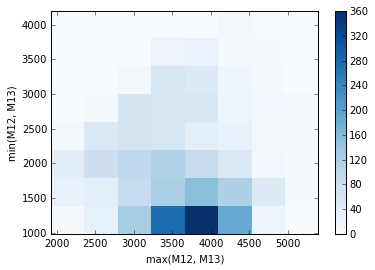

In [27]:
hist2d(numpy.maximum(real_data['M_12'], real_data['M_13']),
       numpy.minimum(real_data['M_12'], real_data['M_13']),
       bins=8, cmap="Blues")
colorbar()
xlabel('max(M12, M13)'), ylabel('min(M12, M13)')
show()

## Looking at local CP-asimmetry
In order to look for CP asymmetry, remind yourself of the concept introduced in section [1]. Think about how you could make use of the two different types of B mesons produced in a proton-proton collision.

In [28]:
real_data['B_Charge'] = real_data.H1_Charge + real_data.H2_Charge + real_data.H3_Charge

Now plot two histograms of the B meson masses of the two different types on the same canvas and comment at differences that you see emerging.

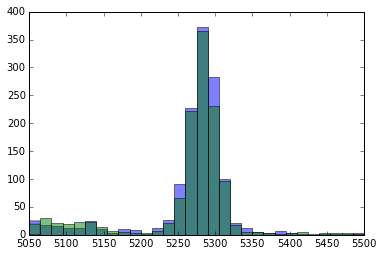

In [29]:
hist(real_data.B_M[real_data.B_Charge == +1].values, bins=30, range=[5050, 5500], alpha=0.5)
hist(real_data.B_M[real_data.B_Charge == -1].values, bins=30, range=[5050, 5500], alpha=0.5)
pass

## (Leaving only signal region in mass) 

## Calculating the Asymmetry
In order to quantify the matter antimatter asymmetry in this process, make use of the two different products created in the proton-proton collision. Think about a way to differentiate between them.

In [30]:
signal_charge = real_data.query('B_M > 5200 & B_M < 5320').B_Charge

Now count the numbers of events of each of the two types (N+ and N-). Also calculate the difference between these two numbers.

In [31]:
n_plus  = numpy.sum(signal_charge == +1)
n_minus = numpy.sum(signal_charge == -1)

In [32]:
print n_plus, n_minus, n_plus - n_minus

1115 1012 103


In order to calculate the Asymmetry, you can make use of the formula:

<img src="http://i.imgur.com/rwgWUP1.png" width="200" />

In [33]:
print 'asymmetry = ', (n_plus - n_minus) / float(n_plus + n_minus)

asymmetry =  0.0484250117536


### Estimating significance of deviation (approximately)

You will now need to calculate the [statistical uncertainty](http://webpages.ursinus.edu/lriley/ref/unc/unc.html) of the asymmetry. You can do so using the formula: <img src="http://i.imgur.com/U9OZsIQ.png" width="200" />

Finally, the significance of the result, sigma, is found by dividing the value for asymmetry by its statistical uncertainty. A value exceeding 3 sigma is considered "evidence" while a value of 5 sigma or more can be called an "observation" or "discovery".

In [34]:
# computing properties of n_plus according to H_0 hypothesis.
n_mean = len(signal_charge) * 0.5
n_std = numpy.sqrt(len(signal_charge) * 0.25)

print 'significance = ', (n_plus - n_mean) / n_std

significance =  2.23333298248


# Subtracting background
using RooFit to fit mixture of exponential (bkg) and gaussian (signal) distributions.

Based on the fit, we estimate number of events in mass region

In [35]:
# Lots of ROOT imports for fitting and plotting
from rootpy import asrootpy, log
from rootpy.plotting import Hist, Canvas, set_style, get_style
from ROOT import (RooFit, RooRealVar, RooDataHist, RooArgList, RooArgSet,
                  RooAddPdf, TLatex, RooGaussian, RooExponential )

/root/miniconda/envs/rep_py2/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


In [36]:
def compute_n_signal_by_fitting(data_for_fit):
    """
    Computing the amount of signal with in region [x_min, x_max]
    returns: canvas with fit, n_signal in mass region 
    """
    # fit limits
    hmin, hmax = data_for_fit.min(), data_for_fit.max()
    
    hist = Hist(100, hmin, hmax, drawstyle='EP')
    root_numpy.fill_hist(hist, data_for_fit)

    # Declare observable x
    x = RooRealVar("x","x", hmin, hmax)
    dh = RooDataHist("dh","dh", RooArgList(x), RooFit.Import(hist))

    frame = x.frame(RooFit.Title("D^{0} mass"))
    # this will show histogram data points on canvas 
    dh.plotOn(frame, RooFit.MarkerColor(2), RooFit.MarkerSize(0.9), RooFit.MarkerStyle(21))

    # Signal PDF
    mean = RooRealVar("mean", "mean", 5300, 0, 6000)
    width = RooRealVar("width", "width", 10, 0, 100)
    gauss = RooGaussian("gauss","gauss", x, mean, width)
    
    # Background PDF
    cc = RooRealVar("cc", "cc", -0.01, -100, 100)
    exp = RooExponential("exp", "exp", x, cc)
    
    # Combined model
    d0_rate = RooRealVar("D0_rate", "rate of D0", 0.9, 0, 1)
    model = RooAddPdf("model","exp+gauss",RooArgList(gauss, exp), RooArgList(d0_rate))
    
    # Fitting model
    result = asrootpy(model.fitTo(dh, RooFit.Save(True)))
    mass = result.final_params['mean'].value
    hwhm = result.final_params['width'].value
    
    # this will show fit overlay on canvas
    model.plotOn(frame, RooFit.Components("exp"), RooFit.LineStyle(3), RooFit.LineColor(3))
    model.plotOn(frame, RooFit.LineColor(4))

    # Draw all frames on a canvas
    canvas = Canvas()
    frame.GetXaxis().SetTitle("m_{K#pi#pi} [GeV]")
    frame.GetXaxis().SetTitleOffset(1.2)
    frame.Draw()
    
    # Draw the mass and error label
    label = TLatex(0.6, 0.8, "m = {0:.2f} #pm {1:.2f} GeV".format(mass, hwhm))
    label.SetNDC()
    label.Draw()

    # Calculate the rate of background below the signal curve inside (x_min, x_max)
    x_min, x_max = 5200, 5330
    
    x.setRange(hmin, hmax)
    bkg_total = exp.getNorm(RooArgSet(x))
    sig_total = gauss.getNorm(RooArgSet(x))
    
    x.setRange(x_min, x_max)
    bkg_level = exp.getNorm(RooArgSet(x))
    sig_level = gauss.getNorm(RooArgSet(x))
    
    bkg_ratio = bkg_level / bkg_total
    sig_ratio = sig_level / sig_total
    
    n_elements = hist.GetEntries()
    
    # TODO - normally get parameter form fit_result
    sig_part = (d0_rate.getVal())
    bck_part = (1 - d0_rate.getVal())
    
    # estimating ratio of signal and background
    bck_sig_ratio = (bkg_ratio * n_elements * bck_part) / (sig_ratio * n_elements * sig_part)
    
    # n_events in (x_min, x_max)
    n_events_in_mass_region = numpy.sum((data_for_fit > x_min) & (data_for_fit < x_max))
    
    n_signal_in_mass_region = n_events_in_mass_region / (1. + bck_sig_ratio)
    
    return canvas, n_signal_in_mass_region

In [37]:
B_mass_range = [5050, 5500]

mass_for_fitting_plus = real_data.query('(B_M > 5050) & (B_M < 5500) & (B_Charge == +1)').B_M
mass_for_fitting_minus = real_data.query('(B_M > 5050) & (B_M < 5500) & (B_Charge == -1)').B_M


INFO:rootpy.stl:generating dictionary for deque<RooAbsArg*> ...
INFO:rootpy.stl:generating dictionary for stack<RooAbsArg*, deque<RooAbsArg*> > ...


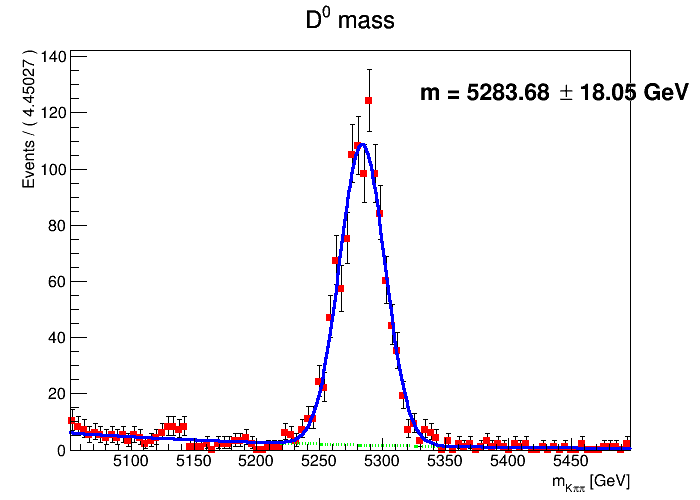

In [38]:
canvas_plus, n_positive_signal = compute_n_signal_by_fitting(mass_for_fitting_plus)
canvas_plus

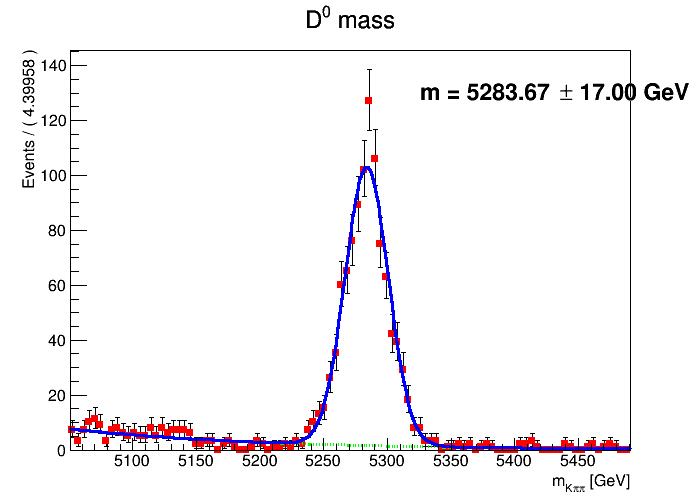

In [39]:
canvas_minus, n_negative_signal = compute_n_signal_by_fitting(mass_for_fitting_minus)
canvas_minus

## Computing asymmetry with subtracted background

In [40]:
print n_positive_signal, n_negative_signal
print (n_positive_signal - n_negative_signal) / (n_positive_signal + n_negative_signal)

1071.56766778 970.247956339
0.0496223607272


In [42]:
n_mean = 0.5 * (n_positive_signal + n_negative_signal)
n_std = numpy.sqrt(0.25 * (n_positive_signal + n_negative_signal))
print (n_positive_signal - n_mean) / n_std

2.24225851983
